#Generative Adversarial Nets 논문 리뷰



##0. abstract

generative model G(생성기) - 데이터의 분포를 포착하는 모델  
discriminative model D(판별기): 한 샘플이 생성기가 아닌 실제 training data로부터 왔을 것이라는 확률을 추정하는 모델

생성기 G의 학습절차는 D가 잘못된 결정을 하게 만들 활률을 최대화 하는 것.
이 프레임워크는 minimax two-player grame이라 볼 수 있다.  
***minimax - 두 참가자가 순차적으로 또는 동시에 의사 결정을 할 때 최악의 경우 발생 가능한 손실을 최소화하려는 의사 결정 규칙을 말한다.** 

저자들은 어떠한 임의의 G, D에 의한 함수공간상에 G가 훈련데이터의 분포를 잘 커버하고 D가 생성기로부터 생성된 가짜 데이터와 진짜 데이터를 구분하지 못하여 항상 1/2의 확률값을 출력하게 된다고 한다.


## 1.Introduction

논문에서 소개되는 adversarial nets 프레임워크는 '경쟁'이 컨셉이다.
discriminative model은 sample data가 G model이 생성해낸 sample data인지, 실제 training data distribution인지 판별하는 것을  학습한다.
눈문에서 GAN의 경쟁하는 과정을 경찰과 위조지폐범 사이의 경쟁으로 비유한다.

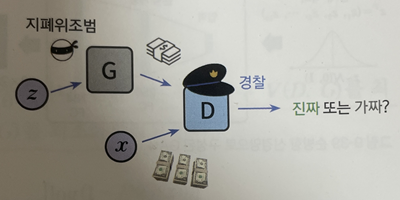

경찰은 진짜 돈과 가짜 돈을 판별하는 역할을 하고, 위조 지폐범은 경찰이 속을 때 까지 가짜 돈을 위조하는 역할을 한다. 경찰은 진짜 돈과 가짜 돈을 번갈아 가며 학습하면서 진짜 돈을 구분해 내는 능력을 키우고, 위조 지폐범은 가짜 돈을 더 진짜 같이 만들어 내는 기술을 키운다. 최종적으로 지폐 위조범은 진짜 돈과 다를 바 없는 위조지폐을 만들게 되고 경찰은 결국 위조 지폐을 구별할 수 있는 확률이 50%가 되는, 위조지폐와 진짜 지폐를 구별 할 수 없는 상태에 이르게 된다.

결국 GAN의 핵심 컨셉은 각각의 열할을 가진 두 모델을 통해 적대적 학습을 하면서 '진짜 같은 가짜'를 생성해내는 능력을 키워주는 것이다.

##3. Adversarial nets

adversarial modeling 프레임워크는 multi-layer perceptrons 모델이 적용 된다.

학습 초반에는 G가 생성해내는 이미지는 D는 G가 생성해낸 가짜 샘플인지 실제 데이터의 샘플인지 바로 구별할 수 있을 만큼 형편없어 D(G(z))의 결과 값이 0에 가깝다.(이때 잠재변수 z로 부터 G가 이미지를 생성해 낸다.) 학습이 진행될수록, G는 실제 데이터의 분포를 모사하면서 D(G(z))의 값이 1이 되도록 발전한다.  



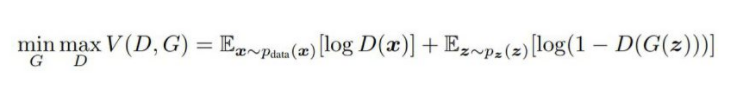

첫번째 항은 real data x를 D에 넣었을 경우 나오는 결과를 log를 취했을 때 얻는 기댓값을 나타낸다.  
두번째 항은 fake data z를 G에 넣었을 경우 나오는 결과를 D에 넣어 1에서 log를 취했을 때 얻는 기댓값을 나타낸다.

이 방정식을 D의 입장, G의 입장에서 각각 이해해보면, -먼저 D의 입장에서 이 value function V(D,G)의 이상적인 결과를 생각해보면, D가 매우 뛰어난 성능으로 판별을 잘 해낸다고 했을 때, D가 판별하려는 데이터가 실제 데이터에서 온 샘플일 경우에는 D(x)가 1이 되어 첫번째 항은 0이 되어 사라지고 G(z)가 생성해낸 가짜 이미지를 구별해낼 수 있으므로 D(G(z))는 0이 되어 두번째 항은 log(1-0)=log1=0이 되어 전체 식 V(D,G) = 0이 된다. 즉 D의 입장에서 얻을 수 있는 이상적인 결과, '최댓값'은 0임을 확인 할 수 있다

그 다음 G의 입장에서 이 value function V(D,G)의 이상적인 결과를 생각해보면, G가 D가 구별못할만큼 진짜와 같은 데이터를 잘 생성해낸다고 했을 때, 첫번째 항은 D가 구별해내는 것에 대한 항으로 G의 성능에 의해 결정될 수 있는 항이 아니므로 패스하고 두번째 항을 살펴보면 G가 생성해낸 데이터는 D를 속일 수 있는 성능이라 가정했기 때문에 D가 G가 생성해낸 이미지를 가짜라고 인식하지 못하고 진짜라고 결정내버린다. 그러므로 D(G(z)) =1이 되고 log(1-1)=log0=마이너스무한대가 된다. 즉, G의 입장에서 얻을 수 있는 이상적인 결과, '최솟값'은 '마이너스무한대'임을 확인할 수 있다.

=>D는 training data의 sample과 G의 sample에 진짜인지 가짜인지 올바른 라벨을 지정할 활률을 최대화하기 위해 학습하고, G는 log(1-D(G(z))를 최소화하기 위해 학습 된다.
=> D입장에서는 V(D,G)를 최대화. G입장에서는 V(D,G)를 최소화시키려 한다.

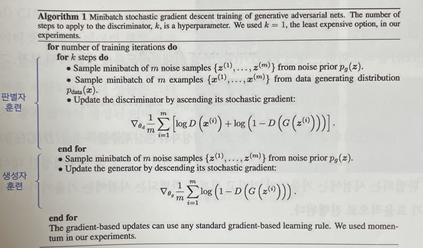

다음은 GAN 훈련 알고리즘이다.   
학습시 inner loop에서 D를 최적화하는 것은 많은 계산들이 필요로 하는데 유한한 데이터셋에서는 과적합(overfitting)을 초래한다. 그래서 D의 경우 k step만큼 최적화하고 G는 1step만큼 최적화하도록 한다.   
앞서 말했듯이, 학습 초반에는 G의 성능이 좋지 않기 때문에 D는 G가 생성해낸 데이터와 실제 데이터 샘플을 너무 잘 구별해 버린다. 이런 경우에는 log(1-D(G(z))가 포화상태가 되므로 log(1-D(G(z))를 최소화하려고 하는 것보다 log(D(G(z))를 최대화되게끔 학습하는 것이 더 좋다.    
***->G의 성능이 좋지 않을 때에는 log(1-D(G(z))의 gradient를 계산했을 때 너무 작은 값이 나오므로 학습이 느리기 때문이다.***

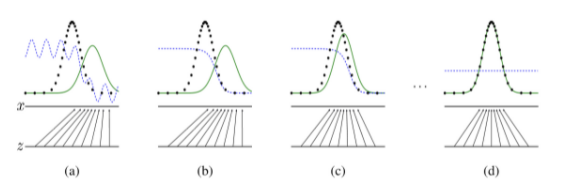

파란 점선 : dkscriminative distrbution  
검은 점선 : data generating distribution(real)  
녹색 실선 : generative distribution(fake)

GAN의 학습 과정을 그림을 통해 확인해보면,
(a) : 훈련 전 초기 상태이다. real과 fake의 분포가 전혀 다른다. D의 성능도 좋지 못하다.   
(b) : D의 경우 (a)처럼 들쑥날쑥하게 확률을 판단하지 않는다. real과 fake를 분명하게 판단하다. D가 최적화 됨   
(C) : D의 학습이 어느정도 이루어 지면, G는 실제 데이터의 분포를 모사하며 D가 구별하기 힘든 방향으로 학습을 한다.   
(D) : D와 G가 번갈아 가며 최적화가 이루어 지면 real과 fake의 분포가 거의 비슷해져 구분할 수 없을 만큼 G가 학습을 하게 된다.   
결국, D(x)= 0.5가 되어 D가 진짜와 가짜를 구분하지 못하는 상태가 되므로 최적화를 종료한다.-> GAN의 최종 결과

##4.Teoretical Results

학습시, G를 직접적으로 학습하는 것이 아니라 G에서 뽑은 데이터가 특정한 조건을 만족하는 방향으로 학습한다. 즉, G가 간접적으로 분포를 나타낼 수 있도록 하므로써 학습을 진행한다. 그래서 결국 학습이 다 마치고 나면 pg(생성자의 분포)=pdata(원본의 분포)에 수렴한다라고 볼 수 있다.

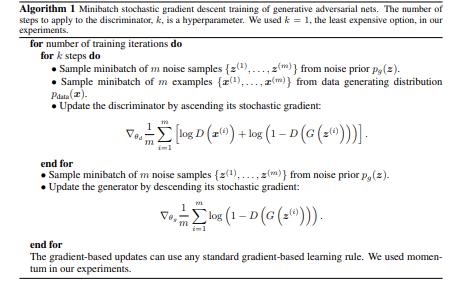

D는 동일한 목적함수에 대해서 asending을 해서 최대화하는 형태로 구하고, G의 입장에서는 뒤의 항에 대해서만 관여 할 수 있기 때문에 뒷쪽 항만 최소화하는 형태로 경사하강법을 이용하여 구할 수 있다.


###4.1 global optimality of pg=padata

저런 목적함수를 이용하여 어떻게 원본 데이터 분포를 학습할 수 있을까?

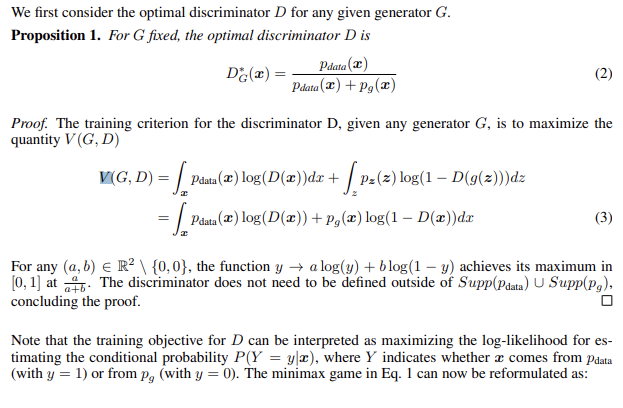

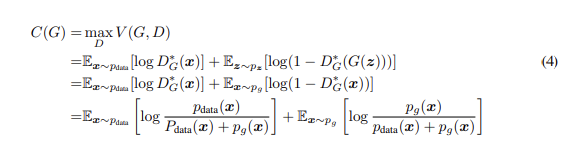

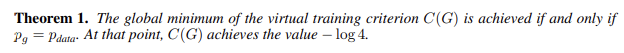

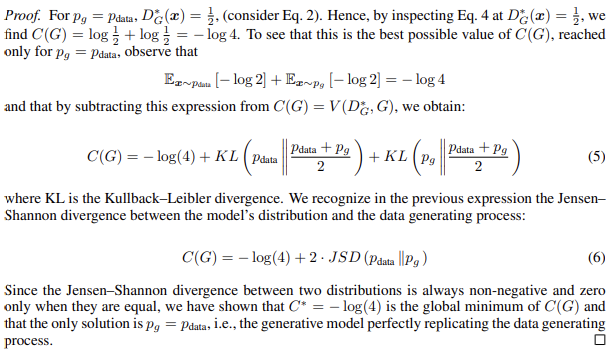

###4.2 Convergence of Algorithm 1

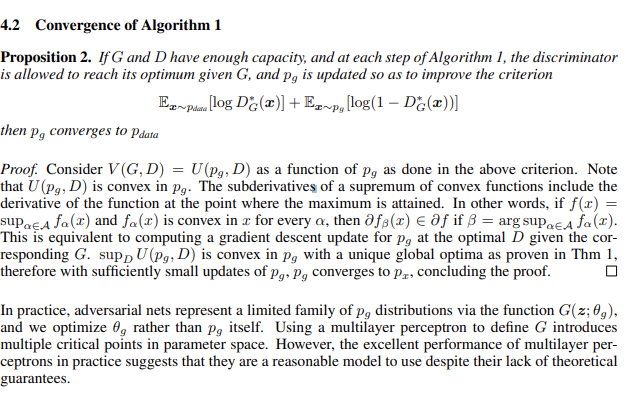

pg가 pdata로 잘 수렴할 수 있는지에 대한 내용을 언급하고 있다.   
기본적으로 함수 v의 형태는 파라미터 도메인 상에서 convex function이기 때문에 역전파와 업데이트 과정을 통해서 빠르게 수렴 할 수 있다고 주장하고 있다.

##5.Experiments

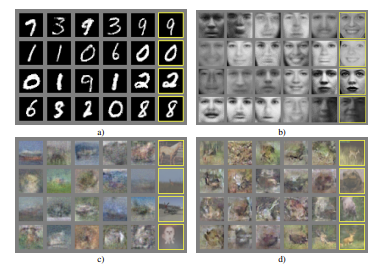

a) MNIST  
b)TFD   
c)CIFAR-10(순방향 모델)   
d)(CIFAR-10(컨벌루션 모델)   
G가 생성해낸 sample이 기존 존재 방법으로 만든 sample보다 좋다고 주장할 수는 없지만, 더 나은 생성모델과 경쟁할 수 있다 생각하며 adversarial framework의 잠재력을 강조하고 있다.

**1년 뒤 2015년에 나온 DCGAN은 고화질의 이미지를 생성하기 시작하였다. 2017년에 나온 WCAN은 더욱 개선된 고화질의 선명한 이미지를 생성하였다. 2018년에 제안된 PGGAN은 1024X1024크기의 고해상도 이미지를 실제 사진과 구분되지 않을 정도로 생성 가능해 졌다.

##6.Advantages and disadvantages



*   단점   
  pg(x)***(가짜 데이터 분포)***가 명시적으로 존재하지 않는다.   
    D와 G가 균형을 잘 맞춰 성능이 항상되어야 한다.  
    -G가 D보다 너무 발전 할 경우 G가 z 데이터를 너무 많이 붕괴 시켜버린다.   
    -D가 G보다 너무 발전 할 경우 D는 G가 만들어낸 데이터에 속지 않기 때문에 G는 계속해서 큰 손실을 만들어내고 학습이 되지 않는다.
*   장점   
  Markov chains이 전혀 필요 없고 gradients를 얻기 위해 back-propagation만이 사용됨
  학습 중 어떠한 추론이 필요 없음
  다양한 함수들이 모델이 접목될 수 있음
  Markov chains을 쓸 때보다 훨씬 선명한 이미지를 얻을 수 있음

##7.Conclusions and future work

1.conditional generative model로 발전시킬 수 있음 (CGAN)    
2.Learned approximate inference는 주어진 x를 예측하여 수행될 수 있음   
3.parameters를 공유하는 conditionals model를 학습함으로써 다른 conditionals    models을 근사적으로 모델링할 수 있음. 특히 MP-DBM의 stochastic extension의 구현 에 대부분의 네트워크를 사용할 수 있음    
4.Semi-supervised learning: 제한된 레이블이 있는 데이터를 사용할 수 있을 때, classifiers의 성능 향상시킬 수 있음   
5.효율성 개선: G,D를 조정하는 더 나은 방법이나 학습하는 동안 sample z에 대한 더 나은 분포를 결정함으로써 학습의 속도를 높일 수 있음




---



